<a href="https://colab.research.google.com/github/BishalDas1010/Loan-default-Prediction/blob/main/Loan_default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kmldas/loan-default-prediction")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'loan-default-prediction' dataset.
Path to dataset files: /kaggle/input/loan-default-prediction


In [ ]:
import os
import pandas as pd

# Get the list of files in the downloaded path again, as the previous cell was not executed.
file_list = os.listdir(path)
print("Files in the dataset directory:", file_list)

# Assuming there's a CSV file in the list. Let's try to find and load the first one.
csv_files = [f for f in file_list if f.endswith('.csv')]

if csv_files:
    # Take the first CSV file found
    csv_file_name = csv_files[0]
    csv_file_path = os.path.join(path, csv_file_name)

    # Load the CSV into a pandas DataFrame
    df = pd.read_csv(csv_file_path)
    print(f"Successfully loaded '{csv_file_name}' into a pandas DataFrame.")

    # Display the first 5 rows of the DataFrame
    display(df.head())
else:
    print("No CSV files found in the dataset directory.")

Files in the dataset directory: ['.nfs000000007753e48100000075', 'Default_Fin.csv']
Successfully loaded 'Default_Fin.csv' into a pandas DataFrame.


,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [ ]:
df.head()


,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [ ]:
df["Defaulted?"].unique()

array([0, 1])

In [ ]:
df =df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [ ]:
X = df.drop(columns=["Defaulted?","Index"])
X

,Employed,Bank Balance,Annual Salary
0,1,8754.36,532339.56
1,0,9806.16,145273.56
2,1,12882.60,381205.68
3,1,6351.00,428453.88
4,1,9427.92,461562.00
...,...,...,...
9995,1,8538.72,635908.56
9996,1,9095.52,235928.64
9997,1,10144.92,703633.92
9998,1,18828.12,440029.32


In [ ]:
y =df["Defaulted?"]
y

,Defaulted?
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=400,
    max_features=3,
    bootstrap=True,
    max_samples=0.8
)
model.fit(X_train, y_train)

RandomForestClassifier(max_features=3, max_samples=0.8, n_estimators=400)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy of the model is {accuracy}")

accuracy of the model is 0.9645


In [ ]:
print(X_test.iloc[0])

Employed              1.00
Bank Balance      17227.92
Annual Salary    378085.08
Name: 6252, dtype: float64


In [ ]:
test = model.predict(X_test.iloc[[3]])
print("pridition is ",test)

pridition is  [0]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

importance = model.feature_importances_

feature_importance = pd.Series(importance, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

print(feature_importance)


Bank Balance     0.681247
Annual Salary    0.306234
Employed         0.012519
dtype: float64


##**Correct Version:**
Cross Validation is a technique used to evaluate a model by splitting the dataset into multiple subsets and calculating the mean accuracy across different training and validation splits.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)

print("All scores:", scores)
print("Mean accuracy:", scores.mean())
print("Std deviation:", scores.std())


All scores: [0.9715 0.969  0.966  0.9715 0.9675]
Mean accuracy: 0.9691000000000001
Std deviation: 0.002177154105707742


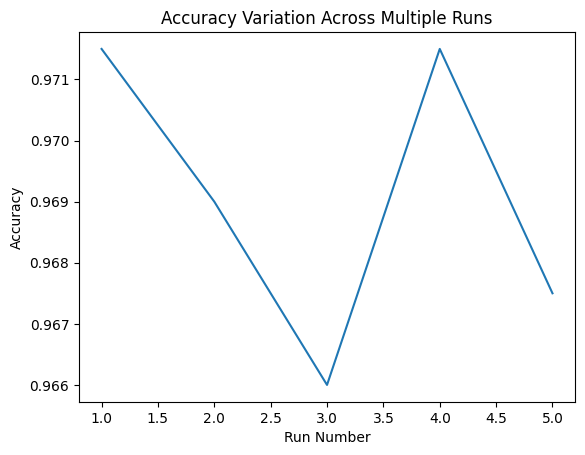

Mean Accuracy: 0.9691000000000001
Standard Deviation: 0.002177154105707742


In [ ]:
# Plot accuracy changes (Single Plot, No Custom Colors)
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(1, len(scores) + 1), scores)

plt.xlabel("Run Number")
plt.ylabel("Accuracy")
plt.title("Accuracy Variation Across Multiple Runs")
plt.show()

print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation:", np.std(scores))

###**save the model**

In [ ]:
import joblib

joblib.dump(model, "rf_model_Loan_default_Prediction.pkl")


['rf_model_Loan_default_Prediction.pkl']